In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

In [9]:
dt=pd.read_csv(r'/content/Sonar Data.csv',header=None)
dt.head()

,0,1,2,3,4,5,6,7,8,9,...,51,52,53,54,55,56,57,58,59,60
0,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032,R
1,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,R
2,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,...,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078,R
3,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,...,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117,R
4,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,...,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094,R


In [13]:
dt.describe()

,0,1,2,3,4,5,6,7,8,9,...,50,51,52,53,54,55,56,57,58,59
count,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,...,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000
mean,0.029164,0.038437,0.043832,0.053892,0.075202,0.104570,0.121747,0.134799,0.178003,0.208259,...,0.016069,0.013420,0.010709,0.010941,0.009290,0.008222,0.007820,0.007949,0.007941,0.006507
std,0.022991,0.032960,0.038428,0.046528,0.055552,0.059105,0.061788,0.085152,0.118387,0.134416,...,0.012008,0.009634,0.007060,0.007301,0.007088,0.005736,0.005785,0.006470,0.006181,0.005031
min,0.001500,0.000600,0.001500,0.005800,0.006700,0.010200,0.003300,0.005500,0.007500,0.011300,...,0.000000,0.000800,0.000500,0.001000,0.000600,0.000400,0.000300,0.000300,0.000100,0.000600
25%,0.013350,0.016450,0.018950,0.024375,0.038050,0.067025,0.080900,0.080425,0.097025,0.111275,...,0.008425,0.007275,0.005075,0.005375,0.004150,0.004400,0.003700,0.003600,0.003675,0.003100
50%,0.022800,0.030800,0.034300,0.044050,0.062500,0.092150,0.106950,0.112100,0.152250,0.182400,...,0.013900,0.011400,0.009550,0.009300,0.007500,0.006850,0.005950,0.005800,0.006400,0.005300
75%,0.035550,0.047950,0.057950,0.064500,0.100275,0.134125,0.154000,0.169600,0.233425,0.268700,...,0.020825,0.016725,0.014900,0.014500,0.012100,0.010575,0.010425,0.010350,0.010325,0.008525
max,0.137100,0.233900,0.305900,0.426400,0.401000,0.382300,0.372900,0.459000,0.682800,0.710600,...,0.100400,0.070900,0.039000,0.035200,0.044700,0.039400,0.035500,0.044000,0.036400,0.043900


In [16]:
dt[60].value_counts()

60
M    111
R     97
Name: count, dtype: int64

In [27]:
X=dt.drop(columns=60,axis=1)
y=dt[60]

In [28]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=1)

In [29]:
model=LogisticRegression()
model.fit(X_train,y_train);

In [30]:
y_pred=model.predict(X_test)

In [33]:
print("Accuracy score :",(accuracy_score(y_test,y_pred))*100)

Accuracy score : 80.95238095238095


In [34]:
print('Classification report: \n',classification_report(y_test,y_pred))

Classification report: 
               precision    recall  f1-score   support

           M       0.77      0.85      0.81        20
           R       0.85      0.77      0.81        22

    accuracy                           0.81        42
   macro avg       0.81      0.81      0.81        42
weighted avg       0.81      0.81      0.81        42



In [35]:
print('Confusion Matrix: \n',confusion_matrix(y_test,y_pred))

Confusion Matrix: 
 [[17  3]
 [ 5 17]]


Now Doing the same classification using **Gaussian Naaive Byes **

In [36]:
from sklearn.naive_bayes import GaussianNB
gnb=GaussianNB()


In [37]:
gnb.fit(X_train,y_train)

GaussianNB()

In [38]:
y_pred=gnb.predict(X_test)

In [40]:
print("Accuracy Score from Gaussian Naive Byes: ",accuracy_score(y_test,y_pred)*100)

Accuracy Score from Gaussian Naive Byes:  59.523809523809526


In [42]:
print("Classification report of Gaussian NB: \n",classification_report(y_test,y_pred))

Classification report of Gaussian NB: 
               precision    recall  f1-score   support

           M       0.62      0.40      0.48        20
           R       0.59      0.77      0.67        22

    accuracy                           0.60        42
   macro avg       0.60      0.59      0.58        42
weighted avg       0.60      0.60      0.58        42



In [43]:
print("Confusion Matrix for Gaussian NB: \n",confusion_matrix(y_test,y_pred))

Confusion Matrix for Gaussian NB: 
 [[ 8 12]
 [ 5 17]]


# Next Up : SVM

In [45]:
from sklearn.svm import SVC
model=SVC(kernel='linear',C=1.0)

In [46]:
model.fit(X_train,y_train)
y_pred=model.predict(X_test)

In [47]:
print("Accuracy score for SVM: ",accuracy_score(y_test,y_pred)*100)

Accuracy score for SVM:  76.19047619047619


In [48]:
print("Classification Report for SVM : \n",classification_report(y_test,y_pred))

Classification Report for SVM : 
               precision    recall  f1-score   support

           M       0.71      0.85      0.77        20
           R       0.83      0.68      0.75        22

    accuracy                           0.76        42
   macro avg       0.77      0.77      0.76        42
weighted avg       0.77      0.76      0.76        42



In [50]:
print("Confusion Matrix: \n",confusion_matrix(y_test,y_pred))

Confusion Matrix: 
 [[17  3]
 [ 7 15]]


# Next Up: Decision Trees

In [51]:
from sklearn.tree import DecisionTreeClassifier
model=DecisionTreeClassifier()

In [52]:
model.fit(X_train,y_train)
y_pred=model.predict(X_test)

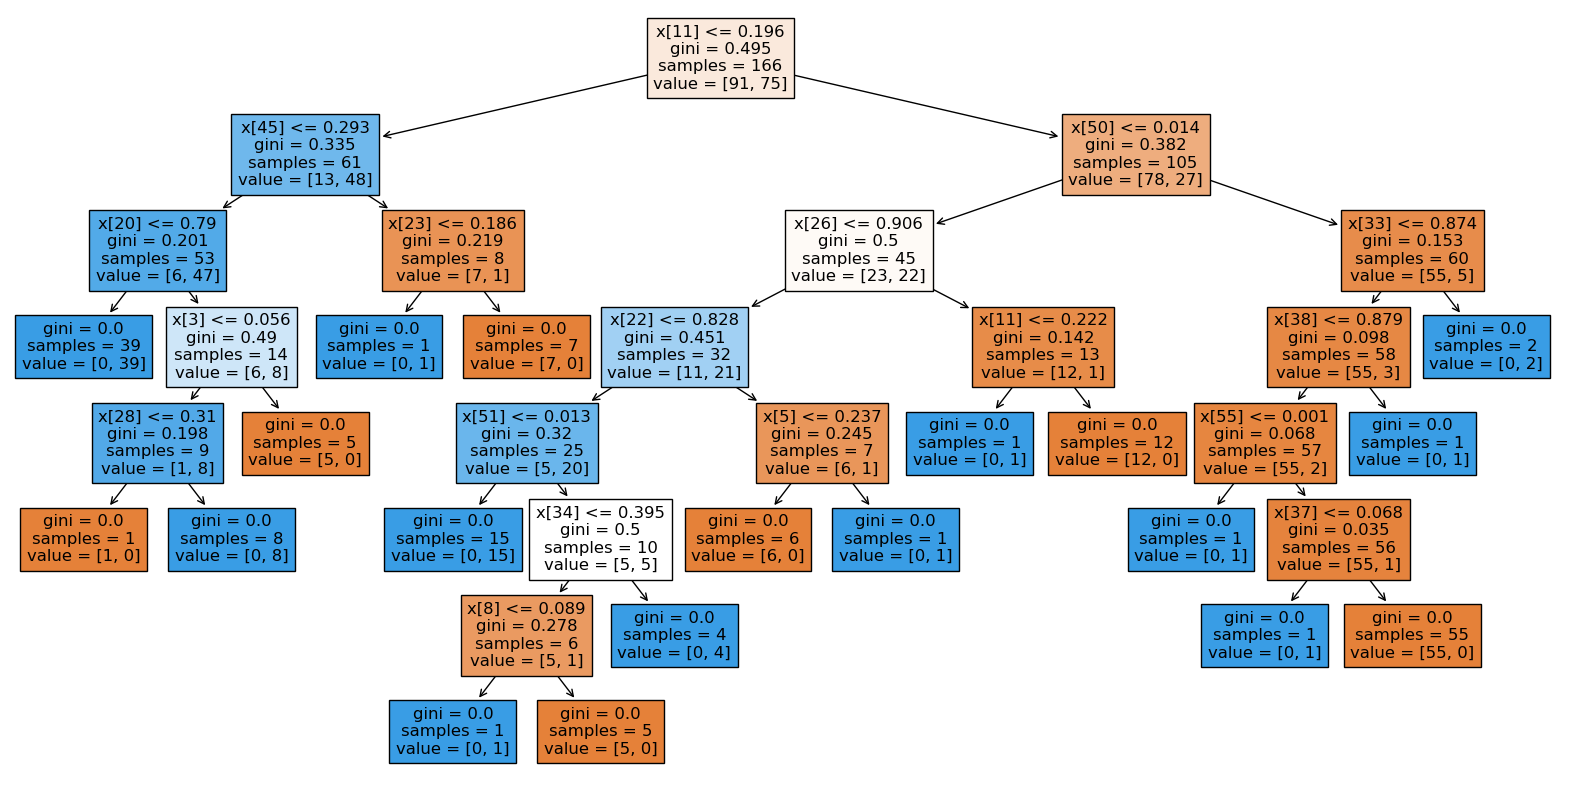

In [56]:
from sklearn import tree
plt.figure(figsize=(20,10))
tree.plot_tree(model, filled=True)
plt.show()

In [59]:
print("Accuracy score for Decision Trees: ",accuracy_score(y_test,y_pred)*100)

Accuracy score for Decision Trees:  69.04761904761905


In [62]:
print("Classification Report for Decision Trees:\n",classification_report(y_test,y_pred))

Classification Report for Decision Trees:
               precision    recall  f1-score   support

           M       0.67      0.70      0.68        20
           R       0.71      0.68      0.70        22

    accuracy                           0.69        42
   macro avg       0.69      0.69      0.69        42
weighted avg       0.69      0.69      0.69        42



In [63]:
print("Confusion Matrix for Decision Trees: \n",confusion_matrix(y_test,y_pred))

Confusion Matrix for Decision Trees: 
 [[14  6]
 [ 7 15]]


Next Up we have our Forests: **Random Forest**

In [66]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=100, random_state=42)

In [68]:
rf.fit(X_train,y_train)
y_pred=rf.predict(X_test)

In [72]:
print("Accuracy for Random forest: ",accuracy_score(y_test,y_pred)*100)

Accuracy for Random forest:  83.33333333333334


In [74]:
print("Classification Report for Random Forest :\n",classification_report(y_test,y_pred))

Classification Report for Random Forest :
               precision    recall  f1-score   support

           M       0.76      0.95      0.84        20
           R       0.94      0.73      0.82        22

    accuracy                           0.83        42
   macro avg       0.85      0.84      0.83        42
weighted avg       0.85      0.83      0.83        42



In [75]:
print("Confusion Matrix: \n",confusion_matrix(y_test,y_pred))

Confusion Matrix: 
 [[19  1]
 [ 6 16]]


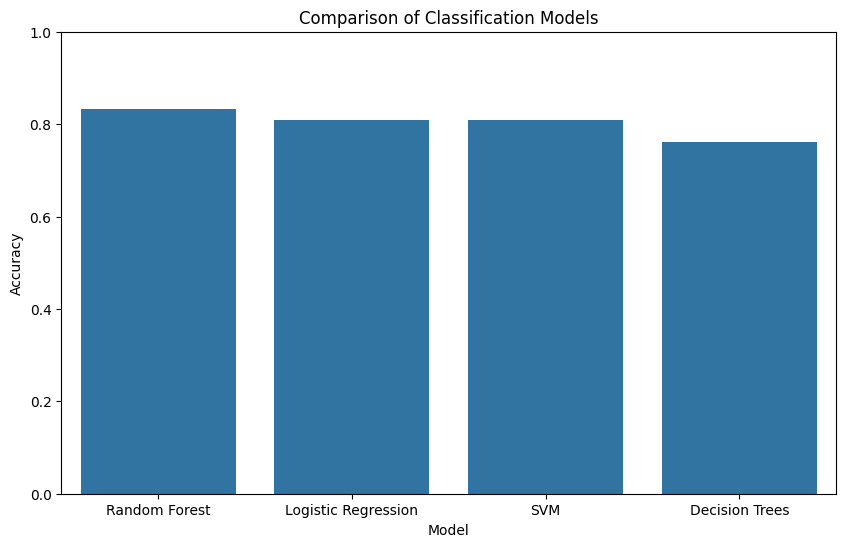

In [78]:
results = []
models = {
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42),
    'Logistic Regression': LogisticRegression(max_iter=200),
    'SVM': SVC(),
    'Decision Trees':DecisionTreeClassifier()
}
for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    results.append({'Model': model_name, 'Accuracy': accuracy})

# Convert results to a DataFrame
results_df = pd.DataFrame(results)

# Plot the results
plt.figure(figsize=(10, 6))
sns.barplot(x='Model', y='Accuracy', data=results_df)
plt.title('Comparison of Classification Models')
plt.ylabel('Accuracy')
plt.xlabel('Model')
plt.ylim(0, 1)
plt.show()